## Задание 2

- решите задачу классификации на ваших данных с использованием рассмотренных моделей sklearn: knn, NB, Logistic Regression, SVM. Не забудьте подобрать гиперпараметры.
- вычислите значения метрик Accuracy, Precision, Recall, F1, ROC AUC score


# Импорт

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, RocCurveDisplay, auc

from joblib import dump


# Загружаем датасет и разбиваем её на выборку.

In [2]:
models = pd.read_csv('../../Data/DataLaba2/neo_task_smoted.csv')
X_train, X_test, y_train, y_test = train_test_split(models.drop('hazardous', axis=1), models['hazardous'], test_size=0.25, random_state=42)


# Подбираем гиппер-параметры.

In [3]:
gaussian_naive_bayes_optimal_n_neighbors = GridSearchCV(GaussianNB(), 
                                                        {'var_smoothing': np.arange(0, 1, 1e-1),
                                                         }, 
                                                         scoring=accuracy_score).fit(X_train, y_train)
gaussian_naive_bayes_optimal_n_neighbors.best_params_

c:\Users\Mike\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Mike\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\Mike\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\_param_validation.py", line 175, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "c:\Users\Mike\AppData\Local\Programs\Python\Python39\lib\inspect.py", line 3062, in bind
    return self._bind(args, kwargs)
  File "c:\Users\Mike\AppData\Local\Programs\Python\Python39\lib\inspect.py", line 2988, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
c:\Users\Mike\AppData\Local\Programs\Python\Python39

{'var_smoothing': 0.0}

# Формула Байеса

In [4]:
gaussian_naive_bayes = GaussianNB(var_smoothing=gaussian_naive_bayes_optimal_n_neighbors.best_params_['var_smoothing'])
gaussian_naive_bayes.fit(X_train, y_train)
y_predicted_by_gaussian_naive_bayes = gaussian_naive_bayes.predict(X_test)

# Оценка качества 

In [5]:
print('Accuracy')
print(accuracy_score(y_test, y_predicted_by_gaussian_naive_bayes))

Accuracy
0.8424557295477828


In [6]:
print('Confusion matrix')
print(confusion_matrix(y_test, y_predicted_by_gaussian_naive_bayes))

Confusion matrix
[[15288  5086]
 [ 1373 19251]]


In [7]:
print('Precision, Recall, F\n', classification_report(y_test, y_predicted_by_gaussian_naive_bayes))

Precision, Recall, F
               precision    recall  f1-score   support

         0.0       0.92      0.75      0.83     20374
         1.0       0.79      0.93      0.86     20624

    accuracy                           0.84     40998
   macro avg       0.85      0.84      0.84     40998
weighted avg       0.85      0.84      0.84     40998



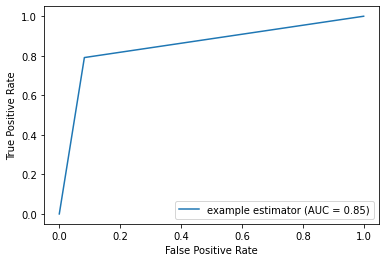

In [8]:
fpr, tpr, thresholds = roc_curve(y_predicted_by_gaussian_naive_bayes, y_test)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()

In [9]:
dump(gaussian_naive_bayes, '../../Pipelines/Laba2/gaussian_naive_bayes.sav')

['../../Pipelines/gaussian_naive_bayes.sav']